In [1]:
#import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [2]:
p = Path("./pokemon_dataset/")

dirs = p.glob("*")

image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Pikachu":0,
              "Bulbasaur":1,
              "Meowth":2 }
label2pokemon = {0:"Pikachu",
              1:"Bulbasaur",
              2:"Meowth"}

for folder_dir in dirs:
    
    label = str(folder_dir).split("/")[-1]
    
    cnt = 0
    print(folder_dir)
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img) 
        image_data.append(img_array)
        
        labels.append(label_dict[label])
        cnt += 1
    print(cnt)

pokemon_dataset/.DS_Store
0
pokemon_dataset/Pikachu
199
pokemon_dataset/Bulbasaur
174
pokemon_dataset/Meowth
70


# Visualization

In [3]:
import numpy as np

In [4]:
print(len(image_data))
print(len(labels))

443
443


In [5]:
import random
random.seed(10)

In [6]:
X = np.array(image_data)
Y = np.array(labels)

# Shuffle our data
# combined = list(zip(X,Y))
# random.shuffle(combined)
# X[:],Y[:] = zip(*combined)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Normalization
X = X/255.0


In [7]:
print(Y)

[1 2 0 0 2 0 1 0 1 0 1 1 1 1 0 1 2 0 1 2 2 1 2 0 1 0 0 2 0 0 1 0 0 1 1 2 0
 2 0 0 1 1 1 0 0 0 1 1 1 2 1 0 0 1 2 1 1 0 0 0 2 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 2 2 1 2 1 1 1 0 2 1 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 0 0 2 2 0 2 1
 1 1 0 2 2 0 0 0 0 1 1 1 0 1 1 1 1 1 2 1 1 0 0 1 1 0 0 1 1 2 1 1 2 0 1 1 0
 0 2 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 2 1 0 1 1 0 0 2 2 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 2 1 0 1 0 0 2 2 1 0 1 1 0 0 1 0 0 0 1 1 2 2 0 0 1 0
 1 0 0 0 1 2 0 0 0 0 0 1 0 1 0 1 1 1 0 1 2 0 2 2 0 1 0 0 0 1 0 2 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 2 0 1 1 1 0 1 1 1 1 0 0 1 1 2 0 0 0 0 1 1 2 0 1 0 2 1
 0 0 1 2 2 0 1 0 2 1 2 2 1 0 0 1 2 2 2 1 2 1 0 1 2 0 2 0 1 0 1 0 0 0 2 1 0
 0 0 1 2 2 2 0 0 1 0 1 2 1 2 0 0 1 0 1 2 1 1 2 1 0 0 0 0 2 1 0 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 2 1 1 1 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 1 1 0
 0 1 1 1 2 0 0 0 1 0 1 1 0 0 0 1 0 0 2 1 1 1 0 1 2 0 2 0 1 1 0 1 0 0 0 0]


In [8]:
# Draw some pokemons 
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.style.use("seaborn")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

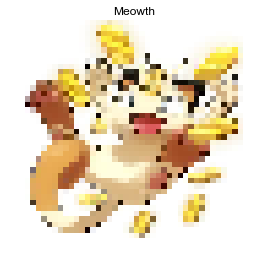

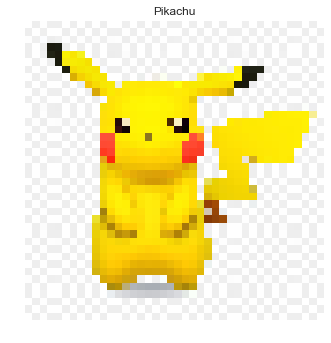

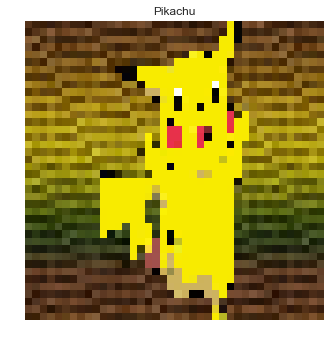

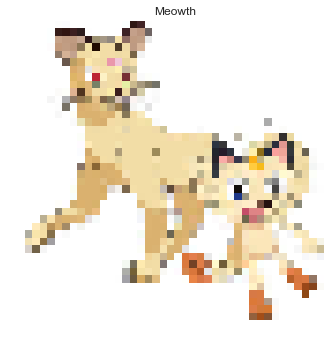

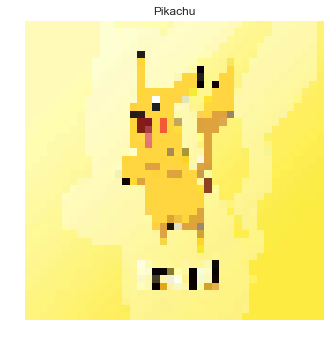

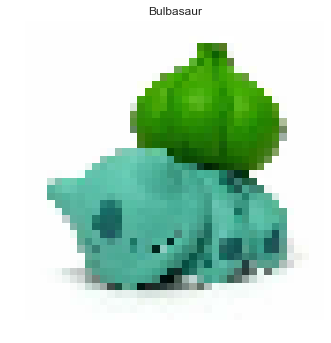

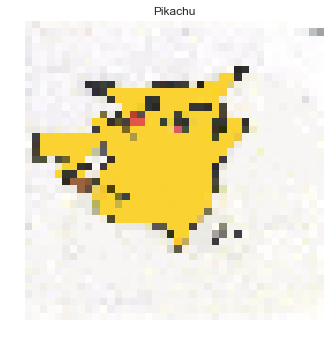

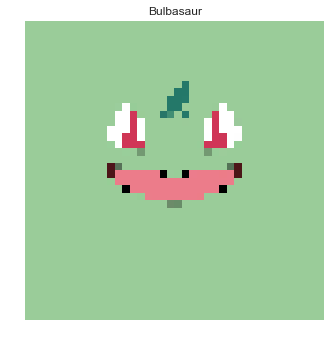

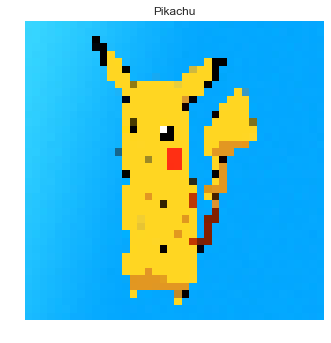

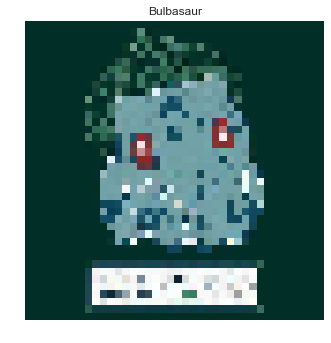

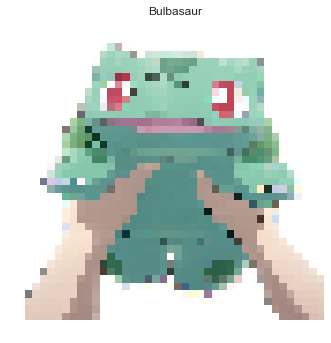

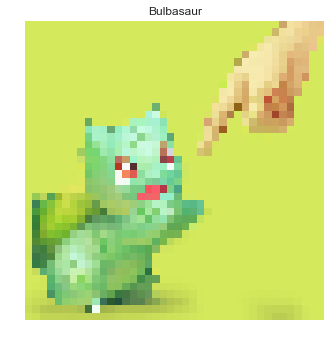

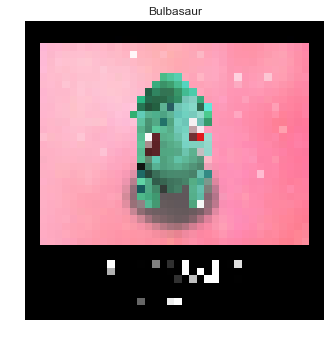

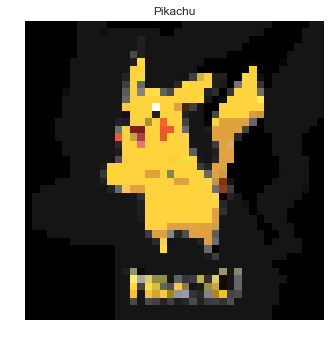

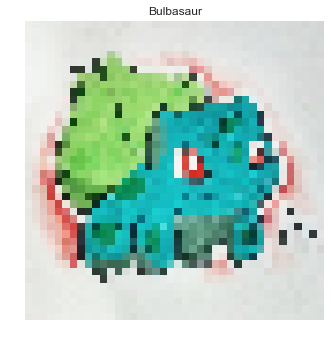

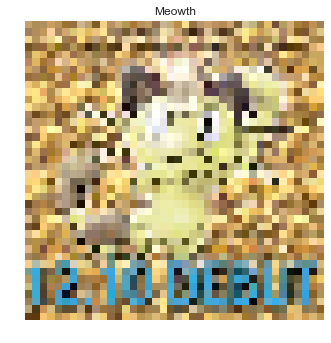

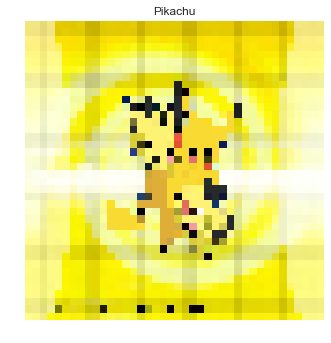

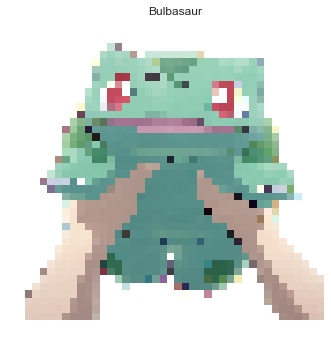

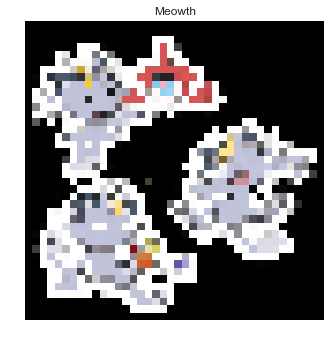

In [9]:
for i in range(1,20):
    drawImg(X[i].reshape(40,40,3),Y[i]) #4800 input units !

In [10]:
### Create Training and Testing set

split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

# Traning Set
X = X_[:split,:]
Y = Y_[:split]

#Testing Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)


(354, 40, 40, 3) (354,)
(89, 40, 40, 3) (89,)


In [11]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        # Everytime we run this code the random values will stay same
        np.random.seed(0)
        
        model = {}
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        
        return y_
    
    def backward(self,x,y,learning_rate=0.001):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        # Output Layer
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        
        #Hidden Layers
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        #Update the model parameter using Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [12]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa, axis = 1, keepdims=True)
    
    return ans

In [13]:
def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [14]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    traning_loss=[]
    
    classes = 3
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        traning_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epochs %d Loss %.4f"%(ix,l))
            
    return traning_loss

In [15]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3)

In [16]:
print(X.shape)

(354, 40, 40, 3)


In [17]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(354, 4800)
(89, 4800)


In [18]:
l = train(X,Y,model,500,0.0002)

Epochs 0 Loss 3.2952
Epochs 1 Loss 2.6449
Epochs 2 Loss 1.7529
Epochs 3 Loss 1.4334
Epochs 4 Loss 1.2708
Epochs 5 Loss 1.2317
Epochs 6 Loss 1.1087
Epochs 7 Loss 1.0380
Epochs 8 Loss 0.9977
Epochs 9 Loss 0.8446
Epochs 10 Loss 0.8550
Epochs 11 Loss 0.7565
Epochs 12 Loss 0.7357
Epochs 13 Loss 0.6899
Epochs 14 Loss 0.6806
Epochs 15 Loss 0.6816
Epochs 16 Loss 0.6606
Epochs 17 Loss 0.6411
Epochs 18 Loss 0.5633
Epochs 19 Loss 0.5438
Epochs 20 Loss 0.5270
Epochs 21 Loss 0.4927
Epochs 22 Loss 0.4980
Epochs 23 Loss 0.4770
Epochs 24 Loss 0.4938
Epochs 25 Loss 0.4784
Epochs 26 Loss 0.4540
Epochs 27 Loss 0.4375
Epochs 28 Loss 0.4222
Epochs 29 Loss 0.4206
Epochs 30 Loss 0.5015
Epochs 31 Loss 0.4212
Epochs 32 Loss 0.4193
Epochs 33 Loss 0.3855
Epochs 34 Loss 0.3540
Epochs 35 Loss 0.3441
Epochs 36 Loss 0.3100
Epochs 37 Loss 0.2940
Epochs 38 Loss 0.3028
Epochs 39 Loss 0.2928
Epochs 40 Loss 0.3071
Epochs 41 Loss 0.2971
Epochs 42 Loss 0.2948
Epochs 43 Loss 0.2819
Epochs 44 Loss 0.2725
Epochs 45 Loss 0.291

Epochs 362 Loss 0.0370
Epochs 363 Loss 0.0369
Epochs 364 Loss 0.0368
Epochs 365 Loss 0.0367
Epochs 366 Loss 0.0366
Epochs 367 Loss 0.0365
Epochs 368 Loss 0.0364
Epochs 369 Loss 0.0363
Epochs 370 Loss 0.0362
Epochs 371 Loss 0.0361
Epochs 372 Loss 0.0360
Epochs 373 Loss 0.0359
Epochs 374 Loss 0.0358
Epochs 375 Loss 0.0357
Epochs 376 Loss 0.0356
Epochs 377 Loss 0.0355
Epochs 378 Loss 0.0354
Epochs 379 Loss 0.0353
Epochs 380 Loss 0.0352
Epochs 381 Loss 0.0351
Epochs 382 Loss 0.0350
Epochs 383 Loss 0.0349
Epochs 384 Loss 0.0348
Epochs 385 Loss 0.0347
Epochs 386 Loss 0.0346
Epochs 387 Loss 0.0345
Epochs 388 Loss 0.0345
Epochs 389 Loss 0.0344
Epochs 390 Loss 0.0343
Epochs 391 Loss 0.0342
Epochs 392 Loss 0.0341
Epochs 393 Loss 0.0340
Epochs 394 Loss 0.0339
Epochs 395 Loss 0.0338
Epochs 396 Loss 0.0337
Epochs 397 Loss 0.0337
Epochs 398 Loss 0.0336
Epochs 399 Loss 0.0335
Epochs 400 Loss 0.0334
Epochs 401 Loss 0.0333
Epochs 402 Loss 0.0332
Epochs 403 Loss 0.0332
Epochs 404 Loss 0.0331
Epochs 405 

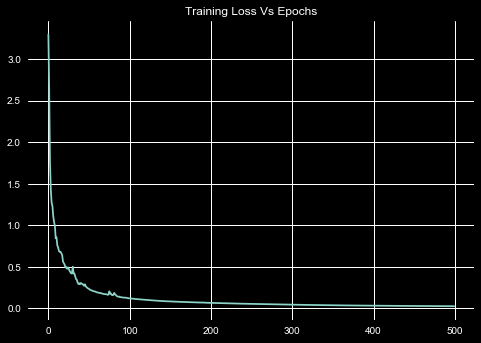

In [19]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss Vs Epochs")
plt.plot(l)

plt.show()

In [20]:
# Accuracy
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs == Y)/Y.shape[0]
    return acc

print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9859
Test Acc 0.6404


In [21]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [23]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[153   2   1]
 [  2 136   0]
 [  0   0  60]]


Confusion matrix, without normalization
[[153   2   1]
 [  2 136   0]
 [  0   0  60]]


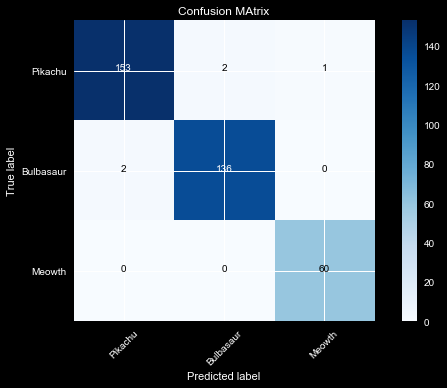

In [24]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion MAtrix")

In [25]:
from sklearn.metrics import classification_report 

In [26]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       156
           1       0.99      0.99      0.99       138
           2       0.98      1.00      0.99        60

    accuracy                           0.99       354
   macro avg       0.99      0.99      0.99       354
weighted avg       0.99      0.99      0.99       354



Confusion matrix, without normalization
[[30  5  3]
 [ 6 25  4]
 [ 8  6  2]]


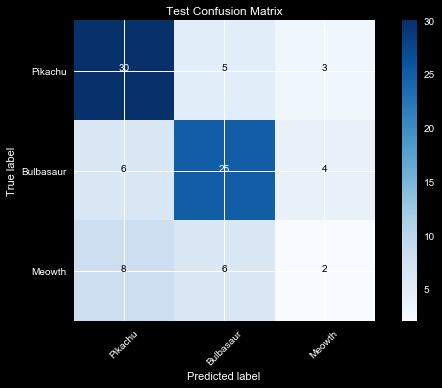

In [27]:
o_Test = model.predict(XTest)
cnf_matrix_Test = confusion_matrix(o_Test,YTest)

plot_confusion_matrix(cnf_matrix_Test,classes=["Pikachu","Bulbasaur","Meowth"],title="Test Confusion Matrix")